In [9]:
%load_ext autoreload
%autoreload 2

import sys

sys.path.append("../..")

import pandas as pd
from pathlib import Path
import pickle

from xlstm_scaling_laws.analysis.parametric_sclaw_fit.run_fit_grid import (
    load_scaling_law_fit_grid_result,
    combine_fit_grid_results_into_df,
    load_combined_fit_grid_df,
)
from xlstm_scaling_laws.fitting.fit_parametric_loss.plot_parametric_loss_fit import (
    plot_parametric_loss_fit,
)
from xlstm_scaling_laws.fitting.fit_parametric_loss.scaling_law_funcs import (
    get_first_n_fits_as_fit_fn_dict,
)
import seaborn as sns
from xlstm_scaling_laws.analysis.parametric_sclaw_fit.plot.plot_scaling_law_fit_grid import (
    get_scaling_law_fit_grid_plot,
)
from plot_config import savefig

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
sel_cols_gamma = [
    ("model_type", ""),
    ("experiment_set", ""),
    ("token_param_range", ""),
    ("optim_results", "loss"),
    ("optim_params", "alpha"),
    ("optim_params", "beta"),
    ("optim_params", "gamma"),
    ("optim_params", "a"),
    ("optim_params", "b"),
    ("optim_params", "e"),
    ("init_params", "alpha"),
    ("init_params", "beta"),
    ("init_params", "gamma"),
    ("init_params", "a"),
    ("init_params", "b"),
    ("init_params", "e"),
    ("val_results", "all#r_squared"),
    ("val_results", "all#mse"),
    ("val_results", "all#mae"),
    ("val_results", "tokenparam#r_squared"),
    ("val_results", "tokenparam#mse"),
    ("val_results", "tokenparam#mae"),
]
sel_cols_no_gamma = [
    ("model_type", ""),
    ("experiment_set", ""),
    ("token_param_range", ""),
    ("optim_results", "loss"),
    ("optim_params", "alpha"),
    ("optim_params", "beta"),
    # ("optim_params", "gamma"),
    ("optim_params", "a"),
    ("optim_params", "b"),
    ("optim_params", "e"),
    ("init_params", "alpha"),
    ("init_params", "beta"),
    # ("init_params", "gamma"),
    ("init_params", "a"),
    ("init_params", "b"),
    ("init_params", "e"),
    ("val_results", "all#r_squared"),
    ("val_results", "all#mse"),
    ("val_results", "all#mae"),
    ("val_results", "tokenparam#r_squared"),
    ("val_results", "tokenparam#mse"),
    ("val_results", "tokenparam#mae"),
]

# L(N,D) scaling law fit plots

In [11]:
data_dir_lnd_fits = "../../data_lnd_fits"

In [12]:
df1 = load_combined_fit_grid_df(
    save_dir=data_dir_lnd_fits,
    use_logsumexp=True,
    huber_delta=1e-3,
    fit_gamma=False,
    context_length=8192,
)

/home/max/myrepos/nxai_public/mlstm_scaling_laws/notebooks/paper_plots/../../xlstm_scaling_laws/analysis/parametric_sclaw_fit/plot/plot_scaling_law_fit_grid.py:62: PerformanceWarning: indexing past lexsort depth may impact performance.
  model_expset_df = combined_fit_grid_df.loc[model_tag, experiment_set]
/home/max/myrepos/nxai_public/mlstm_scaling_laws/notebooks/paper_plots/../../xlstm_scaling_laws/analysis/parametric_sclaw_fit/plot/plot_scaling_law_fit_grid.py:62: PerformanceWarning: indexing past lexsort depth may impact performance.
  model_expset_df = combined_fit_grid_df.loc[model_tag, experiment_set]


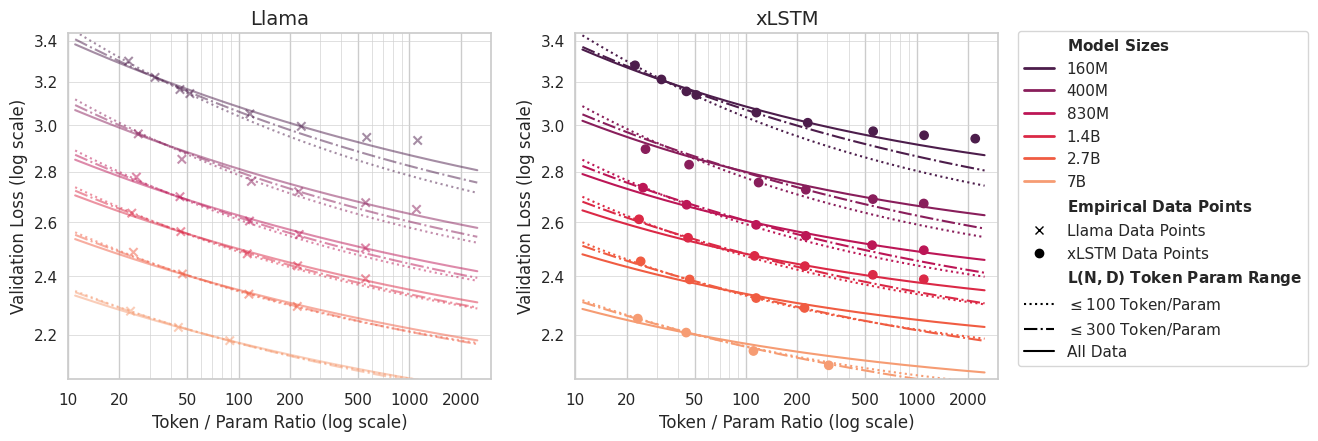

In [13]:
with sns.plotting_context("notebook", font_scale=1.0):
    with sns.axes_style("whitegrid"):
        fig = get_scaling_law_fit_grid_plot(
            combined_fit_grid_df=df1,
            experiment_sets=["tokenparam"],
            title_fontsize=14,
            # token_param_ranges=["0-5000"],
            legend_kwargs={
                "loc": "upper left",
                "bbox_to_anchor": (0.91, 0.9),
                "ncol": 1,
            },
        )

In [14]:
from plot_config import savefig
from itertools import product


def generate_scaling_law_tokenparam_plots(
    fit_dir: Path,
    fit_gammas: list[bool] = [True, False],
    experiment_sets: list[str] = ["tokenparam", "all", "isoflop"],
    filename: str = "lnd_scaling_law_fit_grid",
    huber_delta: float = 1e-3,
):
    for fit_gamma, exp_set in product(fit_gammas, experiment_sets):
        df1 = load_combined_fit_grid_df(
            save_dir=fit_dir,
            use_logsumexp=True,
            huber_delta=huber_delta,
            fit_gamma=fit_gamma,
            context_length=8192,
        )

        with sns.plotting_context("notebook", font_scale=1.0):
            with sns.axes_style("whitegrid"):
                fig = get_scaling_law_fit_grid_plot(
                    combined_fit_grid_df=df1,
                    experiment_sets=[exp_set],
                    title_fontsize=14,
                    # token_param_ranges=["0-5000"],
                )

        full_filename = f"{filename}__expset_{exp_set}_fitgamma_{fit_gamma}"

        print(f"Saving {full_filename}...")
        savefig(
            fig,
            filename=full_filename,
        )

/home/max/myrepos/nxai_public/mlstm_scaling_laws/notebooks/paper_plots/../../xlstm_scaling_laws/analysis/parametric_sclaw_fit/plot/plot_scaling_law_fit_grid.py:62: PerformanceWarning: indexing past lexsort depth may impact performance.
  model_expset_df = combined_fit_grid_df.loc[model_tag, experiment_set]
/home/max/myrepos/nxai_public/mlstm_scaling_laws/notebooks/paper_plots/../../xlstm_scaling_laws/analysis/parametric_sclaw_fit/plot/plot_scaling_law_fit_grid.py:62: PerformanceWarning: indexing past lexsort depth may impact performance.
  model_expset_df = combined_fit_grid_df.loc[model_tag, experiment_set]


Saving lnd_scaling_law_fit_grid__expset_tokenparam_fitgamma_True...


/home/max/myrepos/nxai_public/mlstm_scaling_laws/notebooks/paper_plots/../../xlstm_scaling_laws/analysis/parametric_sclaw_fit/plot/plot_scaling_law_fit_grid.py:62: PerformanceWarning: indexing past lexsort depth may impact performance.
  model_expset_df = combined_fit_grid_df.loc[model_tag, experiment_set]
/home/max/myrepos/nxai_public/mlstm_scaling_laws/notebooks/paper_plots/../../xlstm_scaling_laws/analysis/parametric_sclaw_fit/plot/plot_scaling_law_fit_grid.py:62: PerformanceWarning: indexing past lexsort depth may impact performance.
  model_expset_df = combined_fit_grid_df.loc[model_tag, experiment_set]


Saving lnd_scaling_law_fit_grid__expset_all_fitgamma_True...


/home/max/myrepos/nxai_public/mlstm_scaling_laws/notebooks/paper_plots/../../xlstm_scaling_laws/analysis/parametric_sclaw_fit/plot/plot_scaling_law_fit_grid.py:62: PerformanceWarning: indexing past lexsort depth may impact performance.
  model_expset_df = combined_fit_grid_df.loc[model_tag, experiment_set]
/home/max/myrepos/nxai_public/mlstm_scaling_laws/notebooks/paper_plots/../../xlstm_scaling_laws/analysis/parametric_sclaw_fit/plot/plot_scaling_law_fit_grid.py:62: PerformanceWarning: indexing past lexsort depth may impact performance.
  model_expset_df = combined_fit_grid_df.loc[model_tag, experiment_set]


Saving lnd_scaling_law_fit_grid__expset_isoflop_fitgamma_True...


/home/max/myrepos/nxai_public/mlstm_scaling_laws/notebooks/paper_plots/../../xlstm_scaling_laws/analysis/parametric_sclaw_fit/plot/plot_scaling_law_fit_grid.py:62: PerformanceWarning: indexing past lexsort depth may impact performance.
  model_expset_df = combined_fit_grid_df.loc[model_tag, experiment_set]
/home/max/myrepos/nxai_public/mlstm_scaling_laws/notebooks/paper_plots/../../xlstm_scaling_laws/analysis/parametric_sclaw_fit/plot/plot_scaling_law_fit_grid.py:62: PerformanceWarning: indexing past lexsort depth may impact performance.
  model_expset_df = combined_fit_grid_df.loc[model_tag, experiment_set]


Saving lnd_scaling_law_fit_grid__expset_tokenparam_fitgamma_False...


/home/max/myrepos/nxai_public/mlstm_scaling_laws/notebooks/paper_plots/../../xlstm_scaling_laws/analysis/parametric_sclaw_fit/plot/plot_scaling_law_fit_grid.py:62: PerformanceWarning: indexing past lexsort depth may impact performance.
  model_expset_df = combined_fit_grid_df.loc[model_tag, experiment_set]
/home/max/myrepos/nxai_public/mlstm_scaling_laws/notebooks/paper_plots/../../xlstm_scaling_laws/analysis/parametric_sclaw_fit/plot/plot_scaling_law_fit_grid.py:62: PerformanceWarning: indexing past lexsort depth may impact performance.
  model_expset_df = combined_fit_grid_df.loc[model_tag, experiment_set]


Saving lnd_scaling_law_fit_grid__expset_all_fitgamma_False...


/home/max/myrepos/nxai_public/mlstm_scaling_laws/notebooks/paper_plots/../../xlstm_scaling_laws/analysis/parametric_sclaw_fit/plot/plot_scaling_law_fit_grid.py:62: PerformanceWarning: indexing past lexsort depth may impact performance.
  model_expset_df = combined_fit_grid_df.loc[model_tag, experiment_set]
/home/max/myrepos/nxai_public/mlstm_scaling_laws/notebooks/paper_plots/../../xlstm_scaling_laws/analysis/parametric_sclaw_fit/plot/plot_scaling_law_fit_grid.py:62: PerformanceWarning: indexing past lexsort depth may impact performance.
  model_expset_df = combined_fit_grid_df.loc[model_tag, experiment_set]


Saving lnd_scaling_law_fit_grid__expset_isoflop_fitgamma_False...


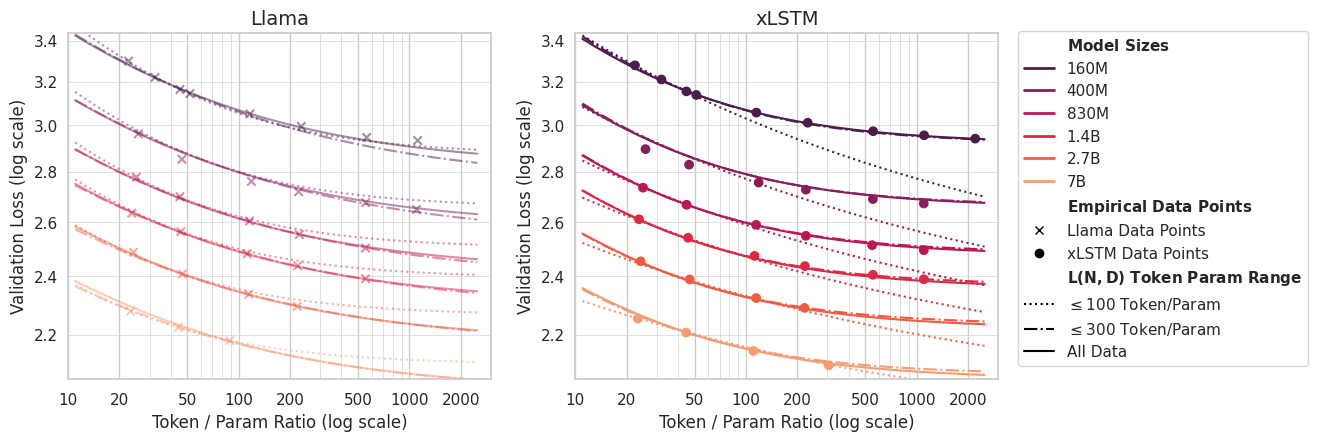

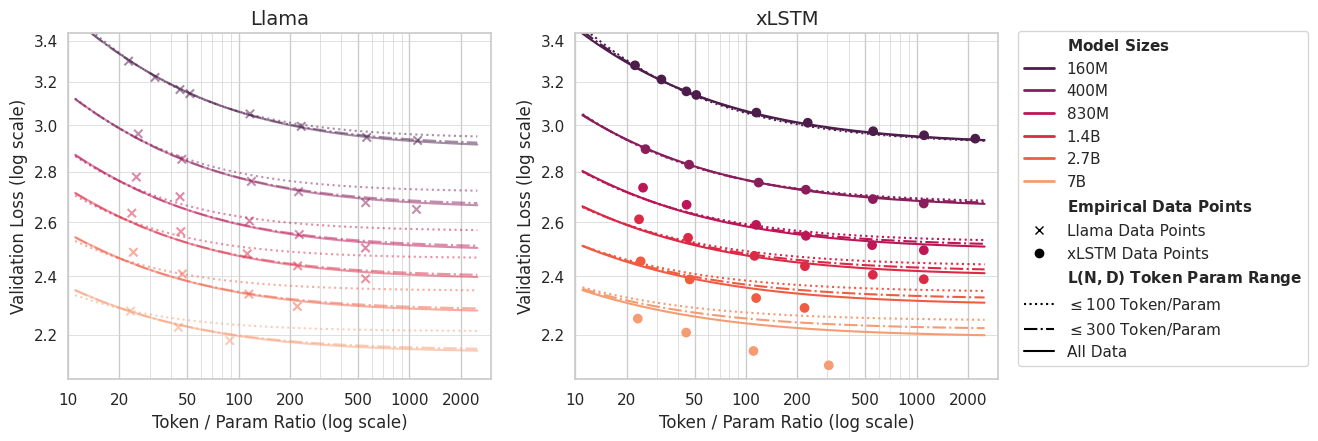

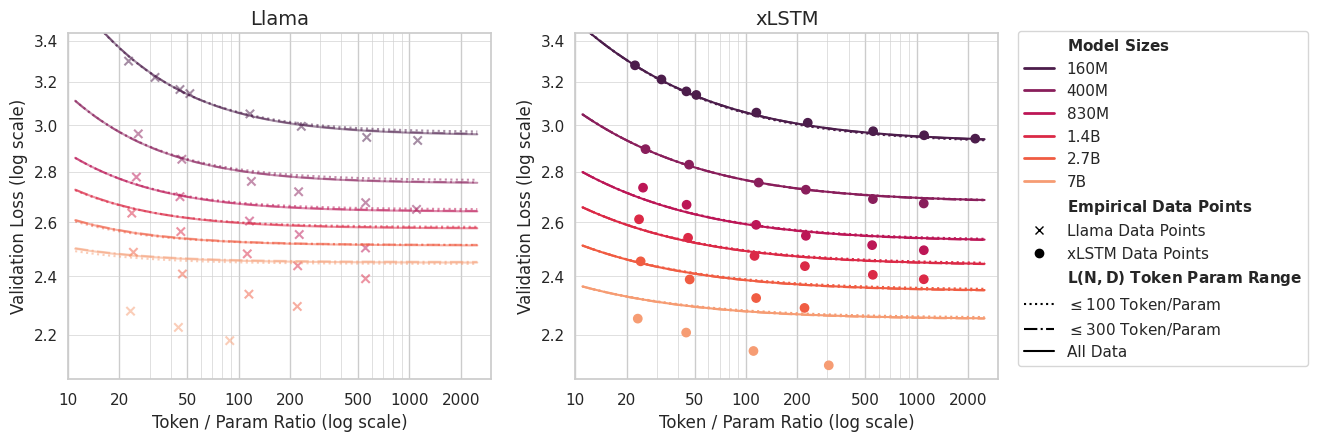

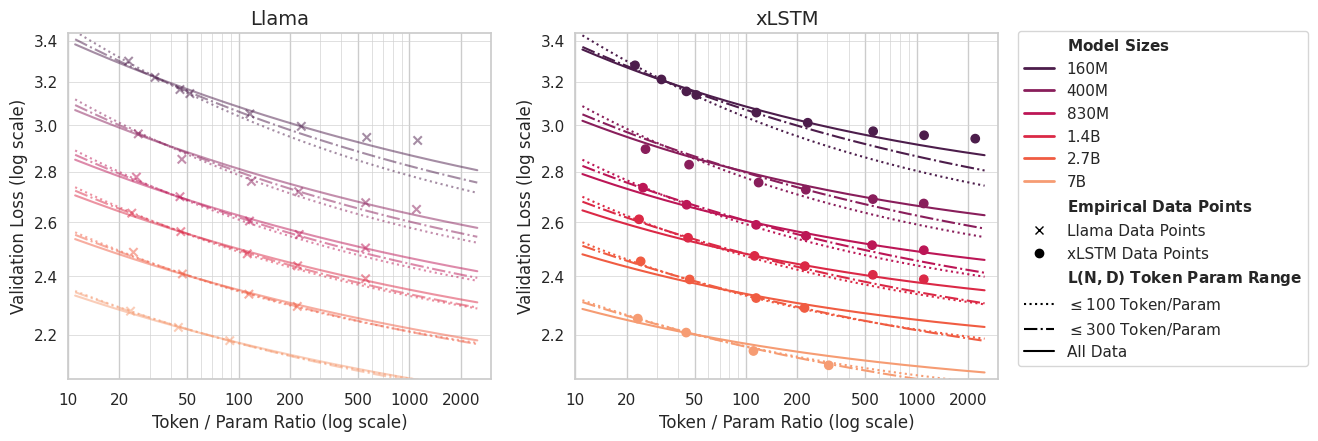

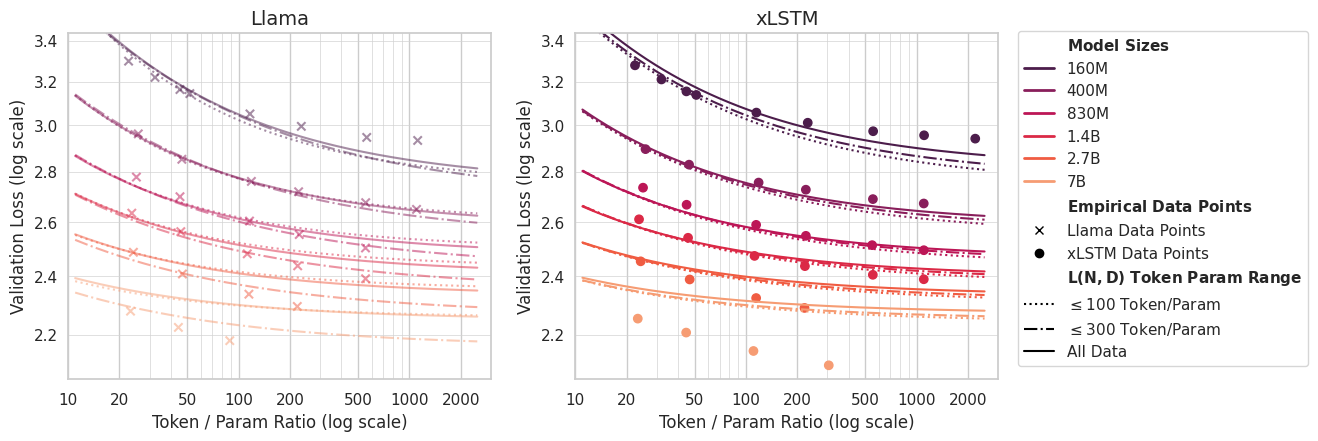

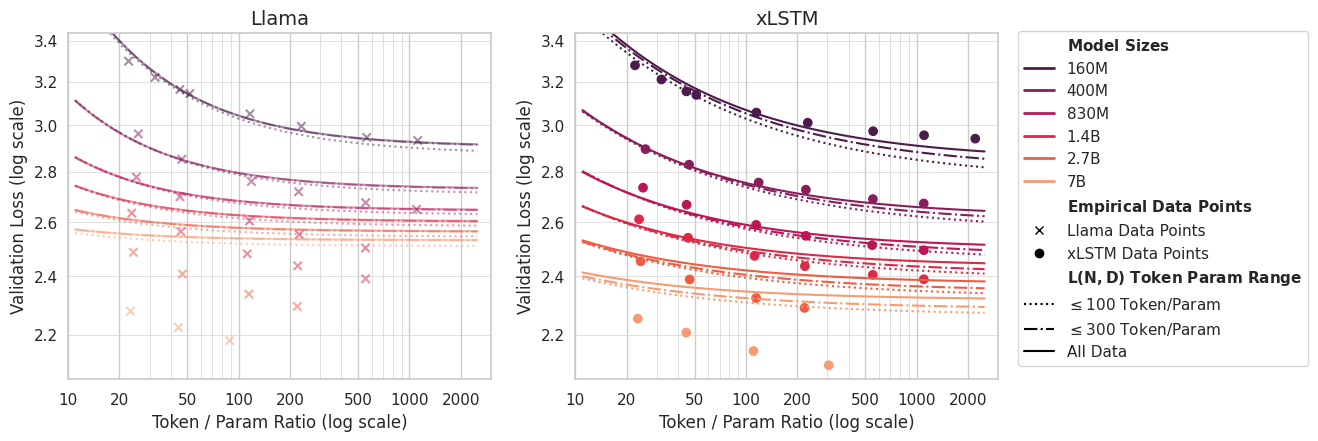

In [15]:
generate_scaling_law_tokenparam_plots(fit_dir=Path(data_dir_lnd_fits))